In [76]:
# import libraries
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import missingno as msno # missing data - Data visualization
from collections import Counter # counting

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [220]:
# load dataset
df = pd.read_csv(r"/Users/User/Downloads/Customer-Churn - Customer-Churn.csv")

In [221]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [223]:
df.shape

(7043, 21)

In [224]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [225]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [226]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [227]:
df.describe(include=["object","bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [228]:
null_vals = df.isnull().sum
null_vals()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

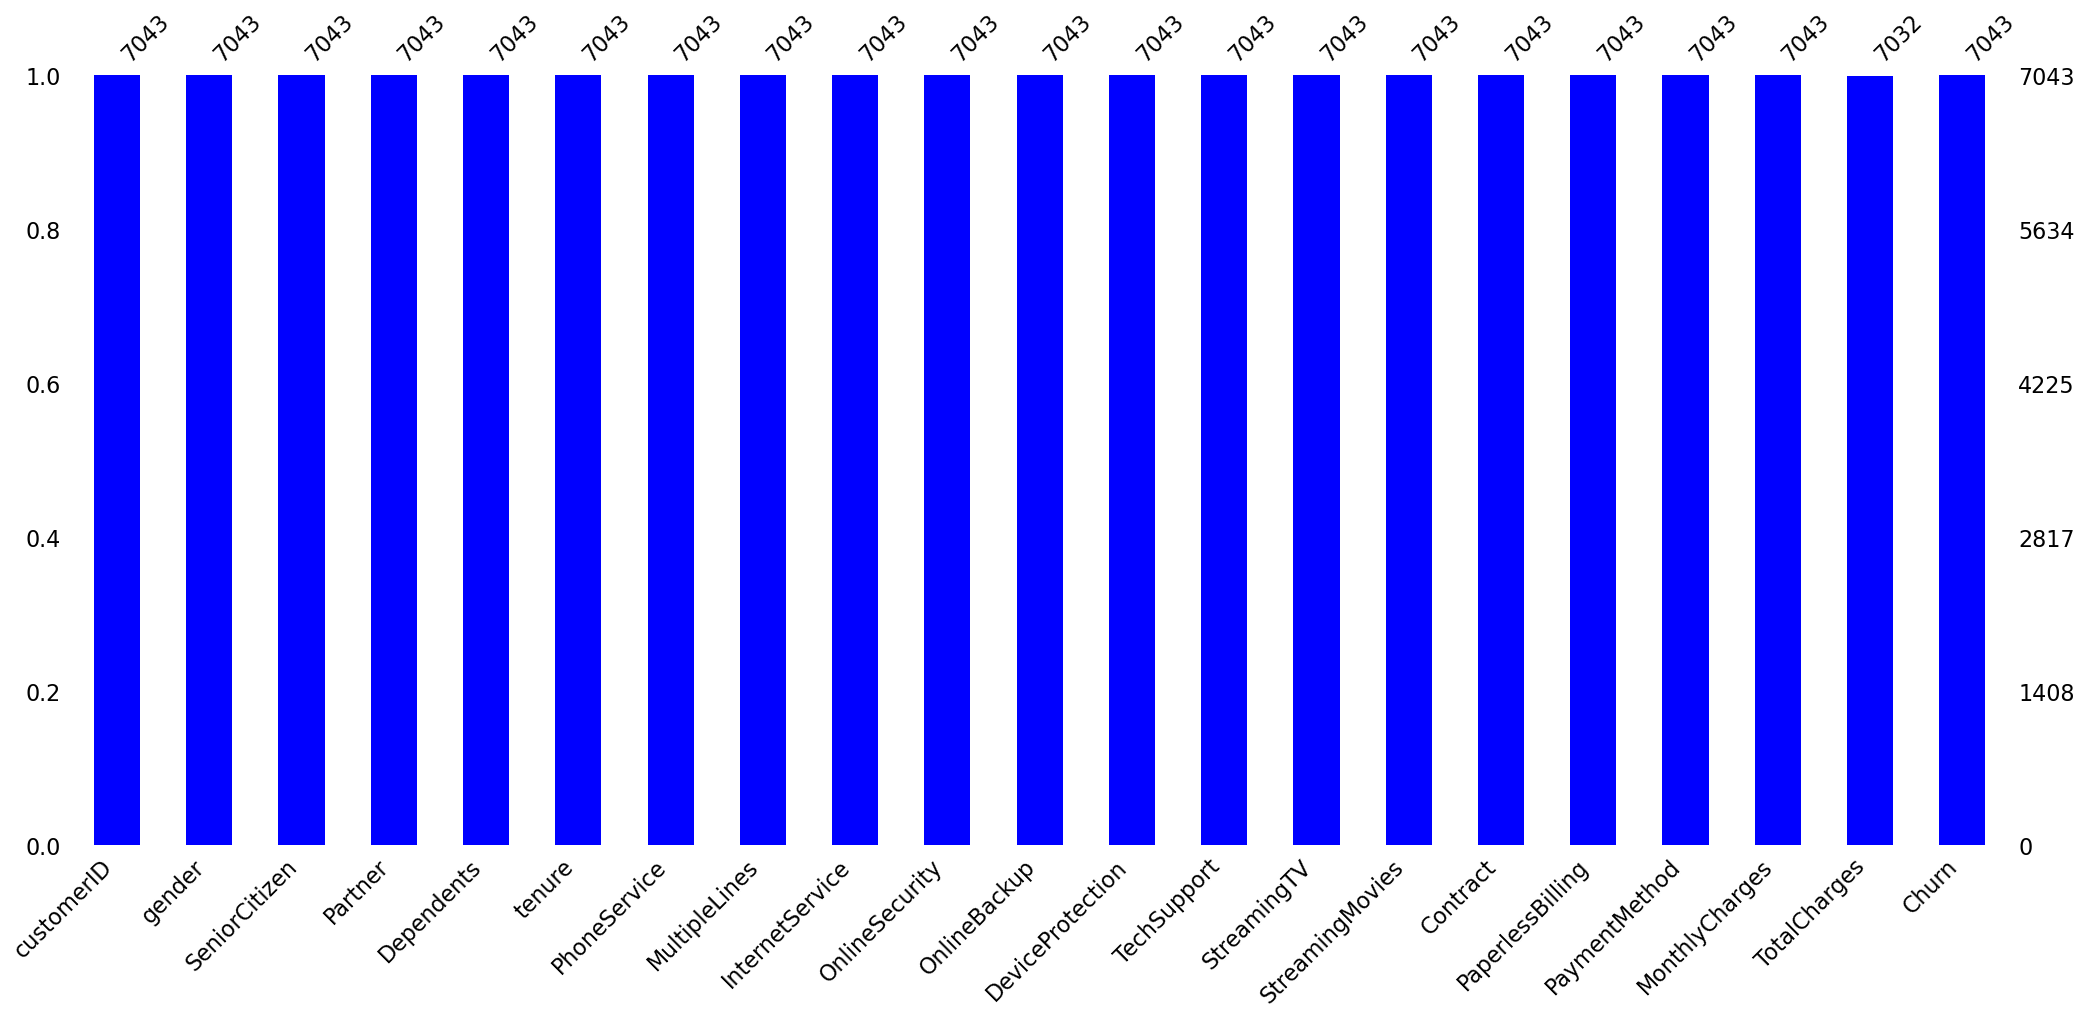

In [229]:
msno.bar(df, color="Blue");

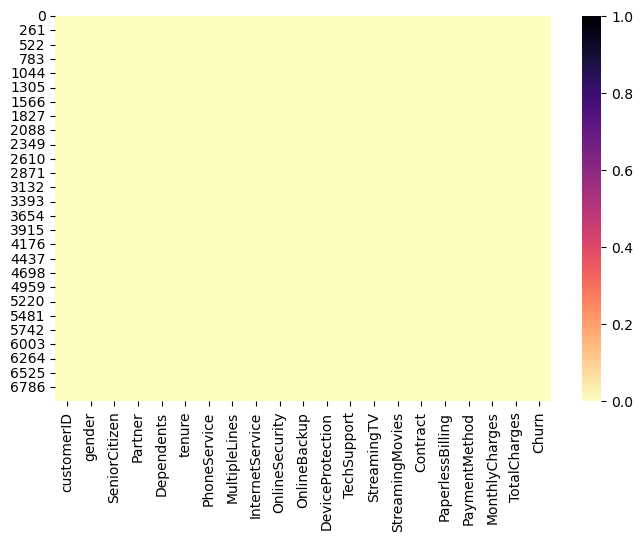

In [230]:
plt .figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap="magma_r");

In [231]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [232]:
df.dropna(inplace=True)

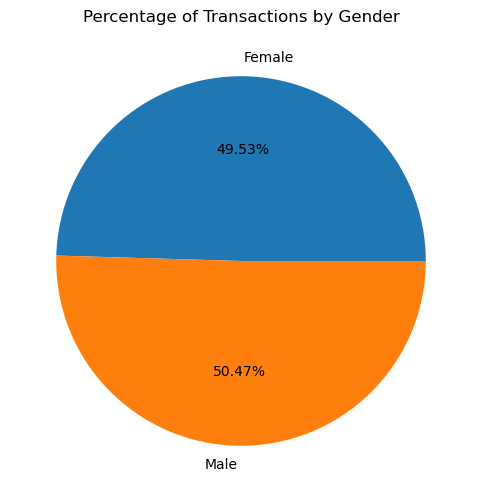

In [233]:
fig,ax = plt.subplots(figsize=(10,6))
count = Counter(df["gender"])
ax.pie(count. values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transactions by Gender")
plt.show();

In [234]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

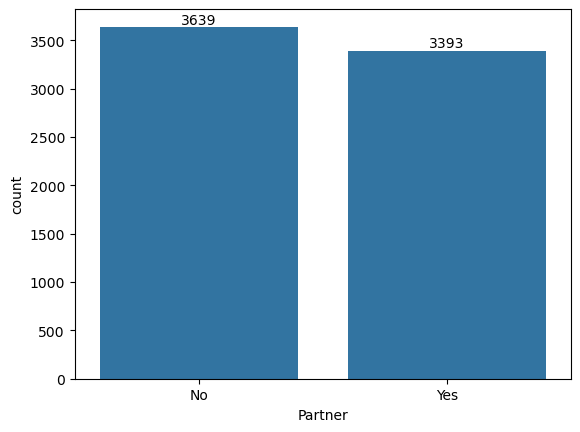

In [235]:
ax = sns.countplot(x=df["Partner"], order=df['Partner'].value_counts(ascending=False).index );
values = df['Partner'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

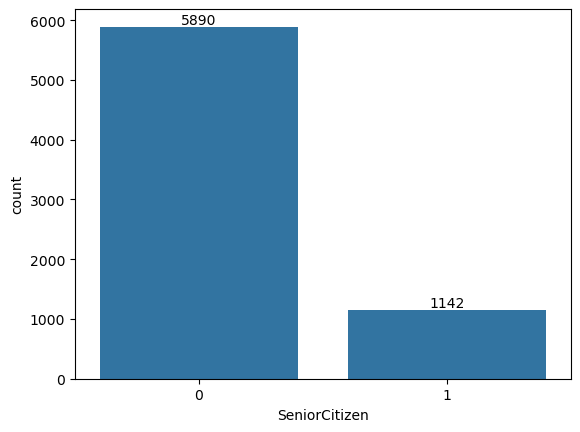

In [236]:
ax = sns.countplot(x=df["SeniorCitizen"], order=df['SeniorCitizen'].value_counts(ascending=False).index );
values = df['SeniorCitizen'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

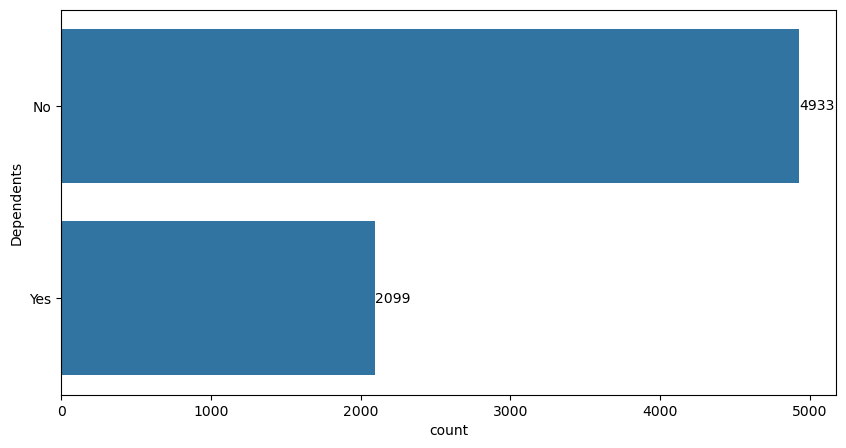

In [237]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=df["Dependents"], order=df['Dependents'].value_counts(ascending=False).index );
values = df['Dependents'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

#### Observations
- Male and female almost equally use connectel services but there is a slightly higher male percentage than the female which could be used to choose the targets of the campaign
- More people without partners tend to use the companies services
- Less Senior Citizens subscribe to connectel services
- More subscribers who are independent make use of connectel services

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [240]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

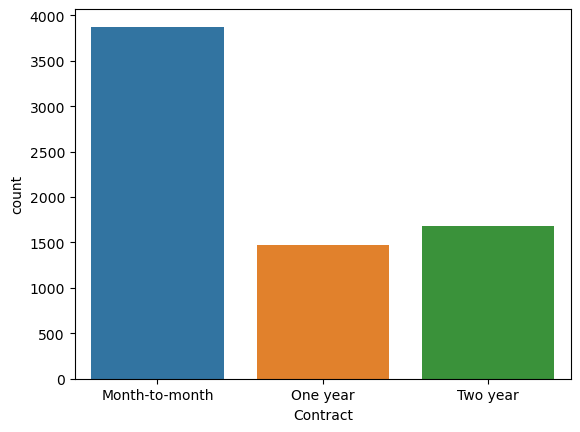

In [80]:
ax = sns.countplot(x='Contract', data=df, hue="Contract")

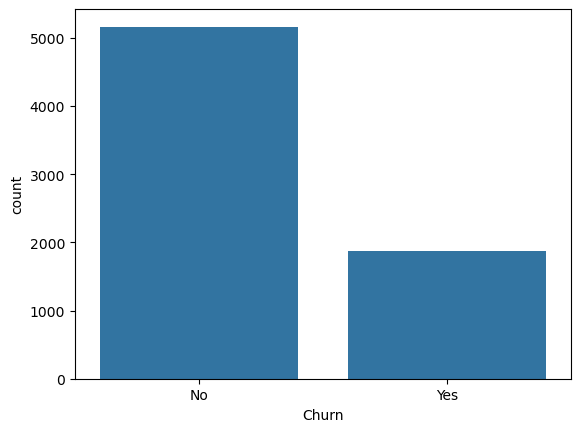

In [241]:
ax = sns.countplot(x='Churn', data=df)

In [242]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

#### Converting the Dataset to integer for supervised model

churn
0    5163
1    1869
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

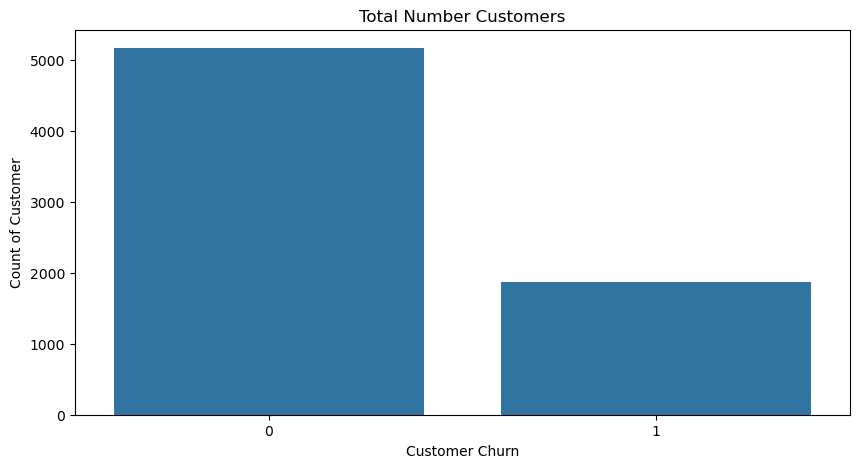

In [291]:
def churn(Churn):
    if Churn == 'Yes':
        return 1
    else:
        return 0

df['churn'] = df['Churn'].apply(churn)
print(df['churn'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='churn', data=df)
plt.xlabel('Customer Churn')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

In [292]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


Gender
1    3549
0    3483
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

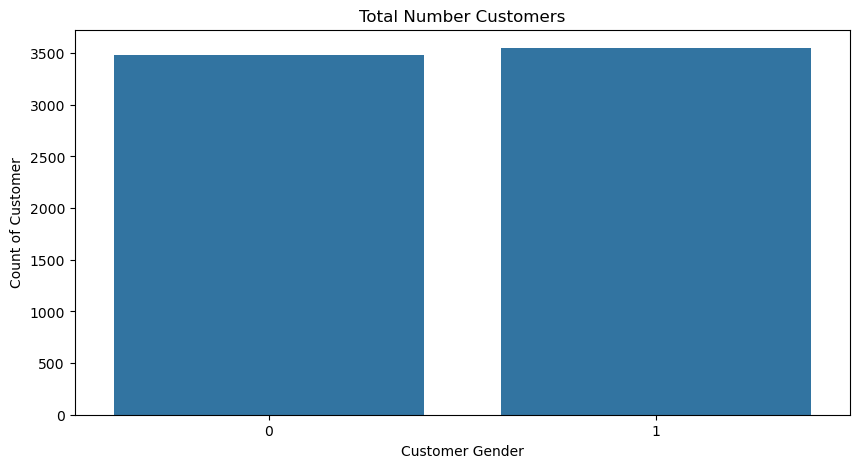

In [293]:
def Gender(gender):
    if gender == 'Male':
        return 1
    else:
        return 0

df['Gender'] = df['gender'].apply(Gender)
print(df['Gender'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='Gender', data=df)
plt.xlabel('Customer Gender')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

In [294]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'Gender'],
      dtype='object')

partner
0    3639
1    3393
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

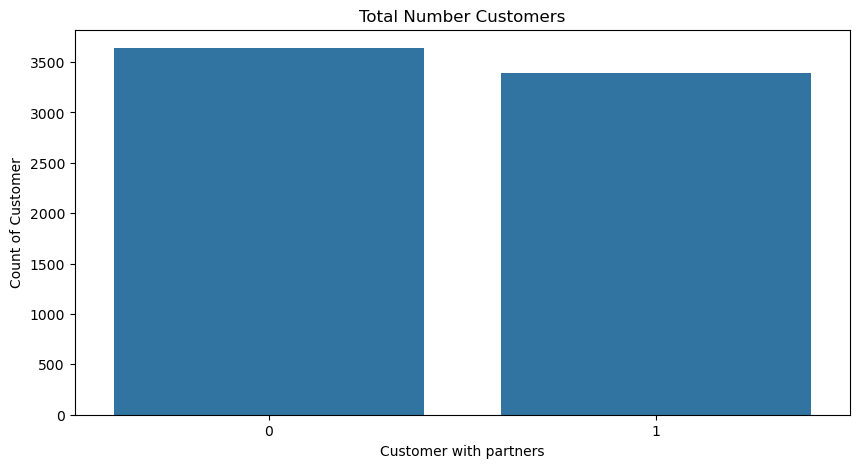

In [295]:
def partner(Partner):
    if Partner == 'Yes':
        return 1
    else:
        return 0

df['partner'] = df['Partner'].apply(partner)
print(df['partner'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='partner', data=df)
plt.xlabel('Customer with partners')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

PS
1    6352
0     680
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

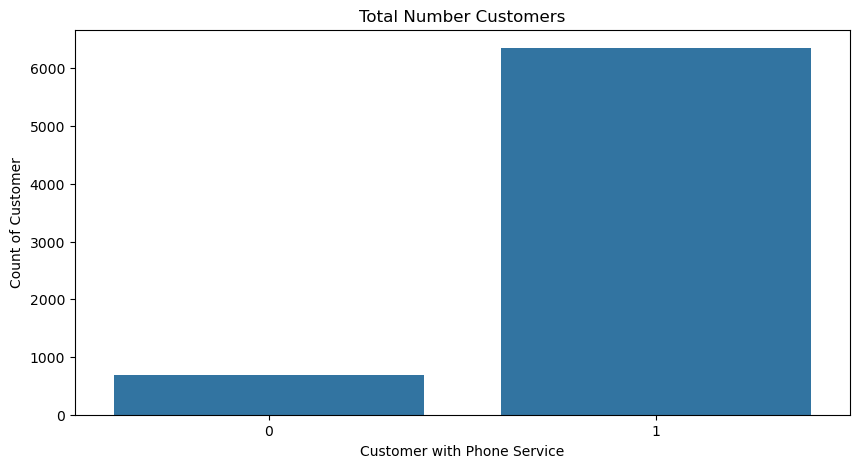

In [296]:
def PS(PhoneService):
    if PhoneService == 'Yes':
        return 1
    else:
        return 0

df['PS'] = df['PhoneService'].apply(PS)
print(df['PS'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='PS', data=df)
plt.xlabel('Customer with Phone Service')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

In [297]:
print(df['MultipleLines'].value_counts())

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


ML
0    3385
1    2967
2     680
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

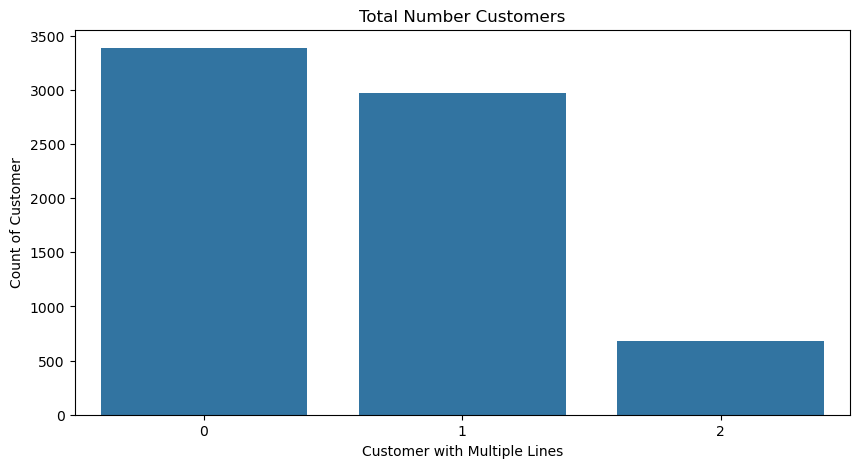

In [298]:
def ML(MultipleLines):
    if MultipleLines == 'Yes':
        return 1
    elif MultipleLines == 'No':
        return 0
    else:
        return 2

df['ML'] = df['MultipleLines'].apply(ML)
print(df['ML'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='ML', data=df)
plt.xlabel('Customer with Multiple Lines')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

In [299]:
print(df['InternetService'].value_counts())

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


IS
1    3096
2    2416
0    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

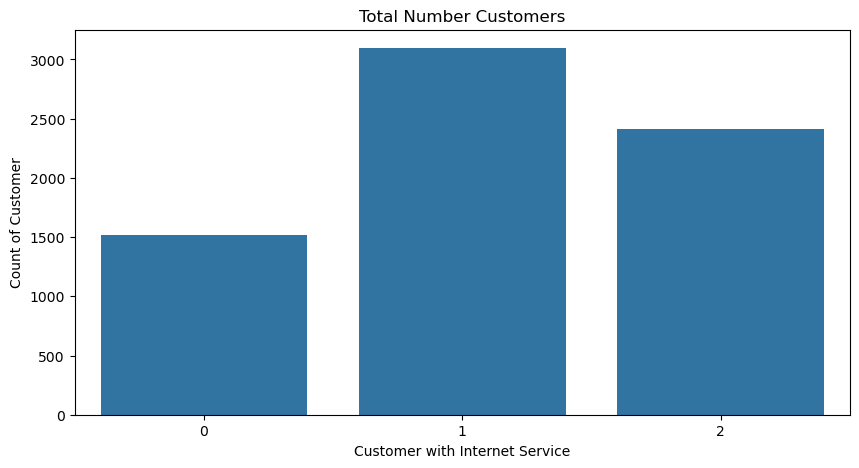

In [300]:
def IS(InternetService):
    if InternetService == 'Fiber optic':
        return 1
    elif InternetService == 'No':
        return 0
    else:
        return 2

df['IS'] = df['InternetService'].apply(IS)
print(df['IS'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='IS', data=df)
plt.xlabel('Customer with Internet Service')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

OS
0    3497
1    2015
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

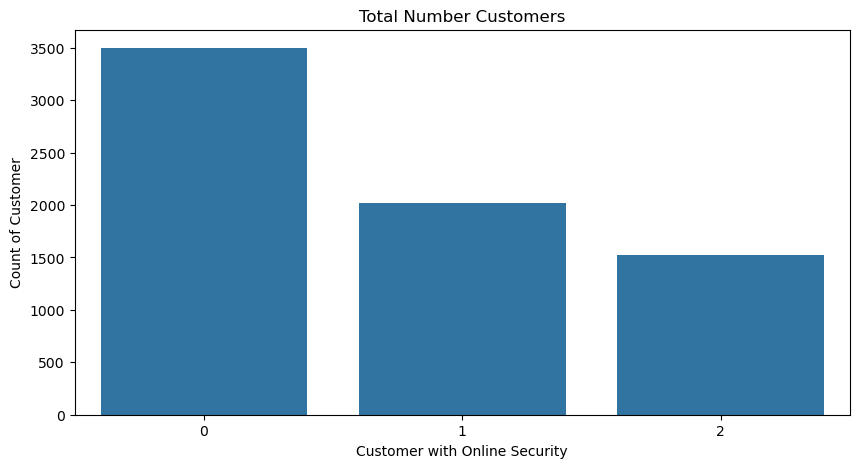

In [301]:
def OS(OnlineSecurity):
    if OnlineSecurity == 'Yes':
        return 1
    elif OnlineSecurity == 'No':
        return 0
    else:
        return 2


    
df['OS'] = df['OnlineSecurity'].apply(OS)
print(df['OS'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='OS', data=df)
plt.xlabel('Customer with Online Security')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

OB
0    3087
1    2425
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

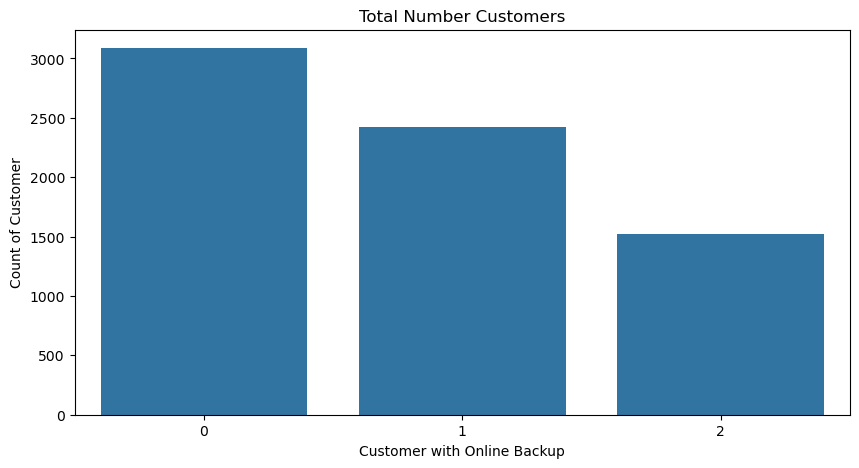

In [302]:
def OB(OnlineBackup):
    if OnlineBackup == 'Yes':
        return 1
    elif OnlineBackup == 'No':
        return 0
    else:
        return 2


    
df['OB'] = df['OnlineBackup'].apply(OB)
print(df['OB'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='OB', data=df)
plt.xlabel('Customer with Online Backup')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

dp
0    3094
1    2418
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

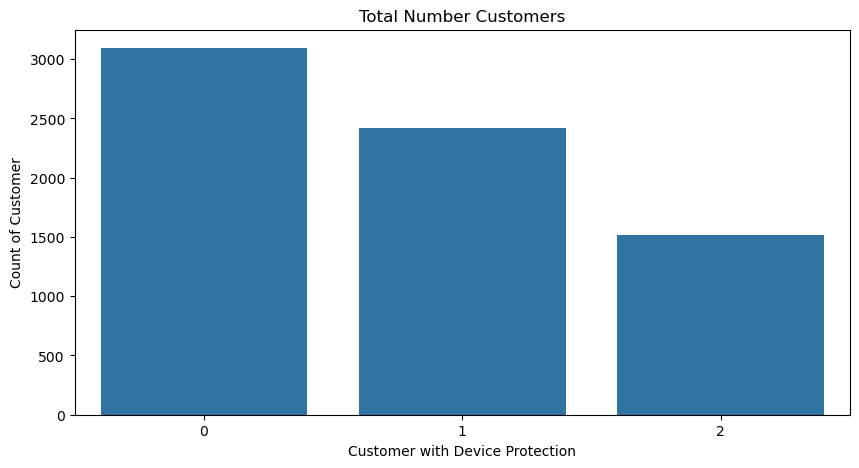

In [303]:
def dp(DeviceProtection):
    if DeviceProtection == 'Yes':
        return 1
    elif DeviceProtection == 'No':
        return 0
    else:
        return 2


    
df['dp'] = df['DeviceProtection'].apply(dp)
print(df['dp'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='dp', data=df)
plt.xlabel('Customer with Device Protection')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

ts
0    3472
1    2040
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

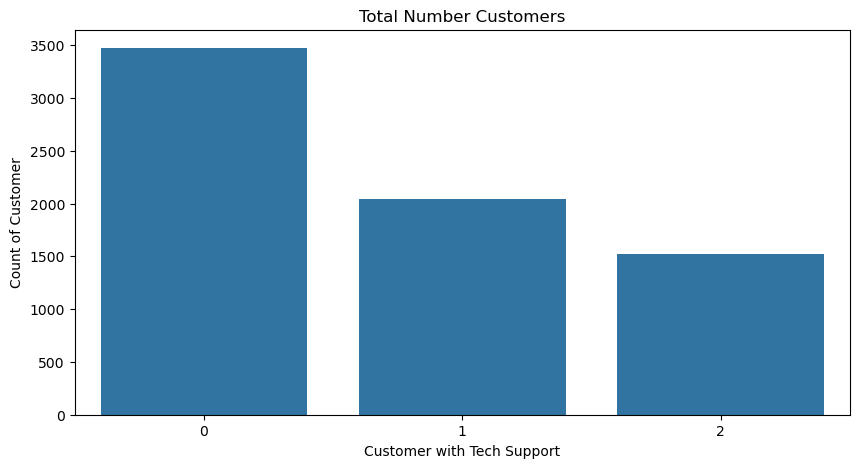

In [304]:
def ts(TechSupport):
    if TechSupport == 'Yes':
        return 1
    elif TechSupport == 'No':
        return 0
    else:
        return 2


    
df['ts'] = df['TechSupport'].apply(ts)
print(df['ts'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='ts', data=df)
plt.xlabel('Customer with Tech Support')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

STV
0    2809
1    2703
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

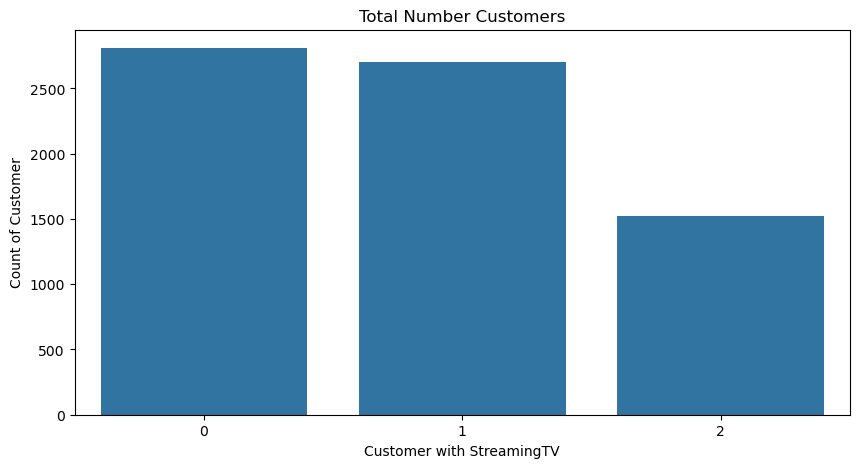

In [305]:
def STV(StreamingTV):
    if StreamingTV == 'Yes':
        return 1
    elif StreamingTV == 'No':
        return 0
    else:
        return 2


    
df['STV'] = df['StreamingTV'].apply(STV)
print(df['STV'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='STV', data=df)
plt.xlabel('Customer with StreamingTV')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

SM
0    2781
1    2731
2    1520
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

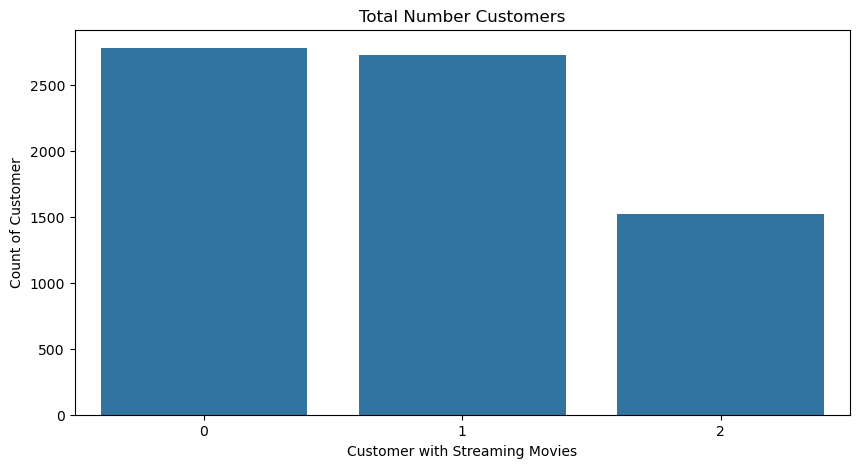

In [306]:
def SM(StreamingMovies):
    if StreamingMovies == 'Yes':
        return 1
    elif StreamingMovies == 'No':
        return 0
    else:
        return 2


    
df['SM'] = df['StreamingMovies'].apply(SM)
print(df['SM'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='SM', data=df)
plt.xlabel('Customer with Streaming Movies')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

contract
1    3875
0    1685
2    1472
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

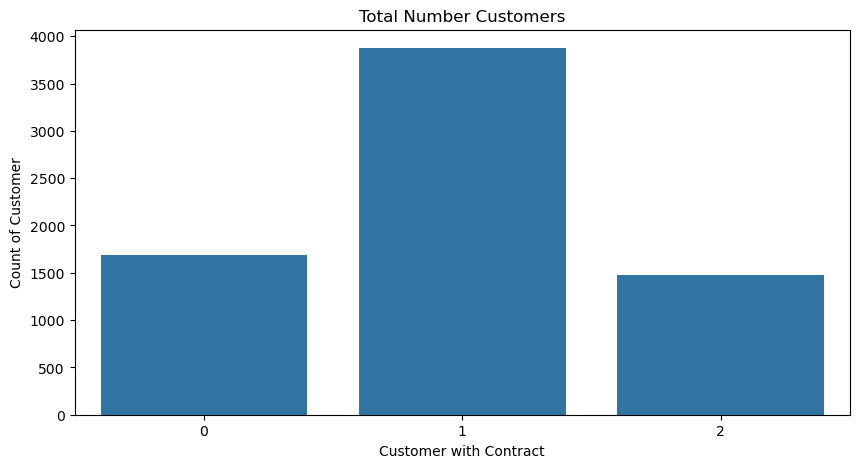

In [307]:
def contract(Contract):
    if Contract == 'Month-to-month':
        return 1
    elif Contract == 'Two year':
        return 0
    else:
        return 2


    
df['contract'] = df['Contract'].apply(contract)
print(df['contract'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='contract', data=df)
plt.xlabel('Customer with Contract')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

PB
1    4168
0    2864
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

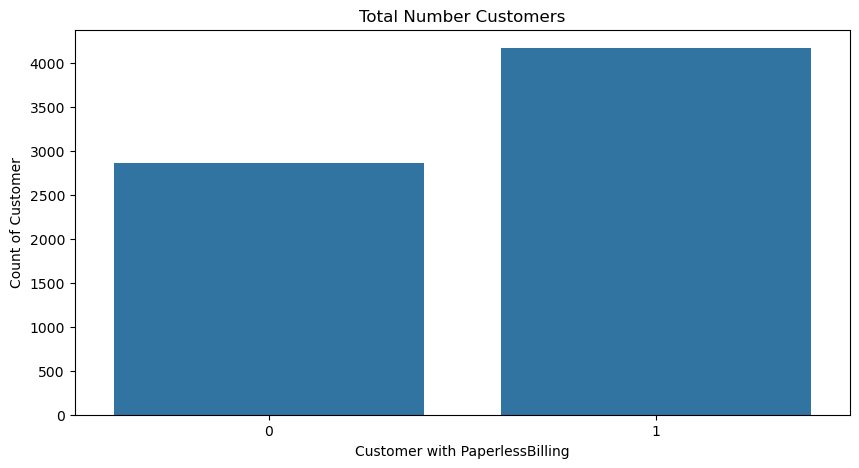

In [308]:
def PB(PaperlessBilling):
    if PaperlessBilling == 'Yes':
        return 1
    else:
        return 0

df['PB'] = df['PaperlessBilling'].apply(PB)
print(df['PB'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='PB', data=df)
plt.xlabel('Customer with PaperlessBilling')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

pm
0    2365
1    1604
2    1542
3    1521
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number Customers')

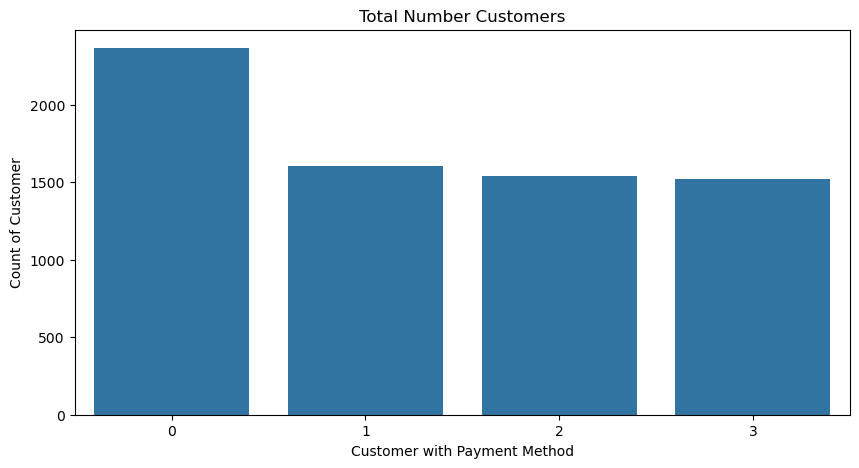

In [309]:
def pm(PaymentMethod):
    if PaymentMethod == 'Electronic check':
        return 0
    elif PaymentMethod == 'Mailed check':
        return 1
    elif PaymentMethod == 'Bank transfer (automatic)':
        return 2
    else:
        return 3
    
df['pm'] = df['PaymentMethod'].apply(pm)
print(df['pm'].value_counts())
#investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x='pm', data=df)
plt.xlabel('Customer with Payment Method')
plt.ylabel('Count of Customer')
plt.title('Total Number Customers')

#### Bivariate Analysis

In [244]:
count

Counter({'Male': 3549, 'Female': 3483})

In [245]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

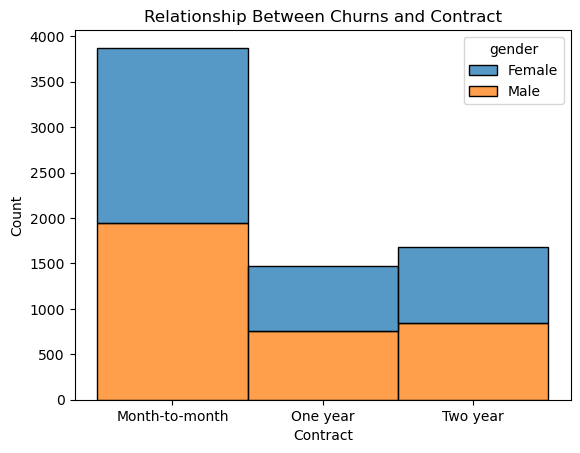

In [92]:
sns.histplot(binwidth=0.5, x="Contract", hue="gender", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Contract');

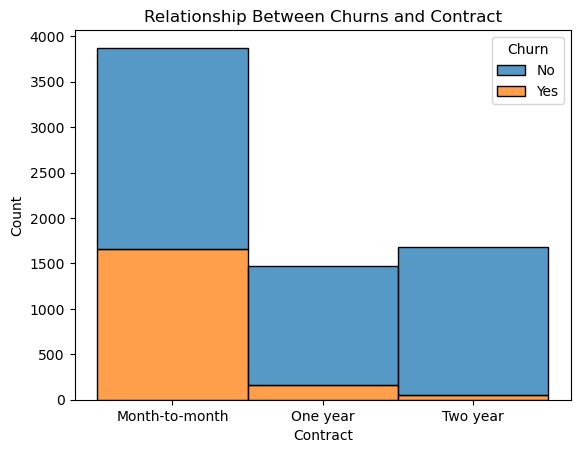

In [246]:
sns.histplot(binwidth=0.5, x="Contract", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Contract');

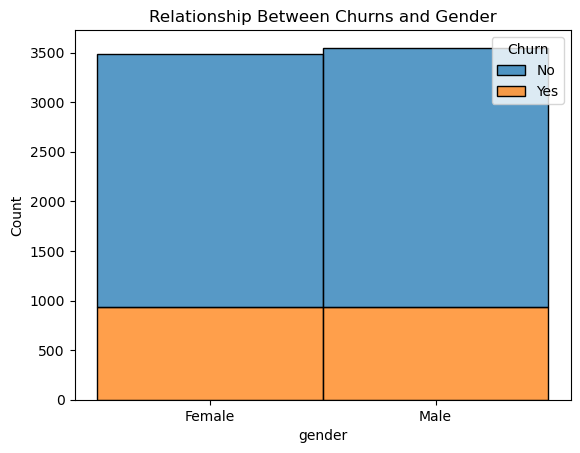

In [247]:
sns.histplot(binwidth=0.5, x="gender", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Gender');

<Axes: xlabel='SeniorCitizen', ylabel='count'>

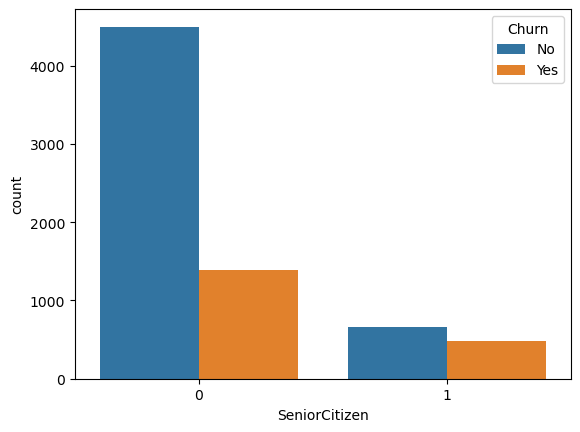

In [108]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

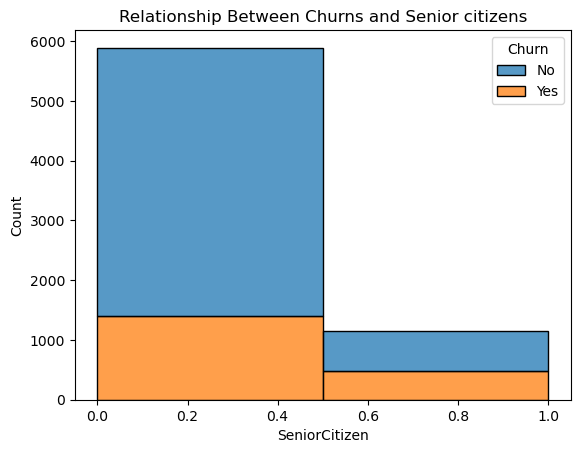

In [248]:
sns.histplot(binwidth=0.5, x="SeniorCitizen", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Senior citizens');

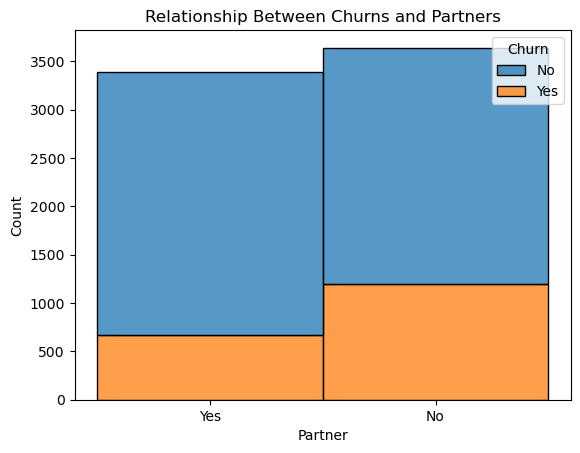

In [249]:
sns.histplot(binwidth=0.5, x="Partner", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Partners');

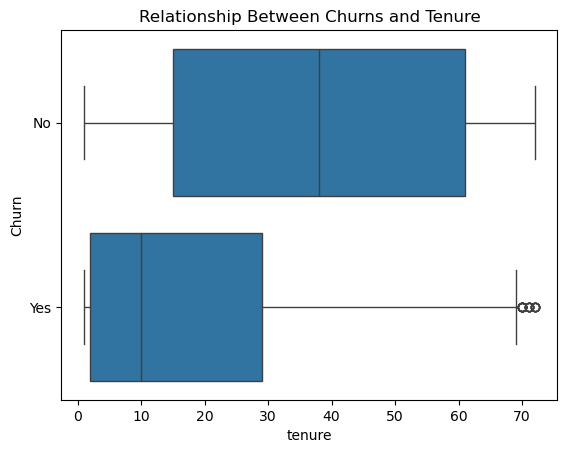

In [250]:
sns.boxplot(x="tenure", y="Churn", data=df).set_title('Relationship Between Churns and Tenure');

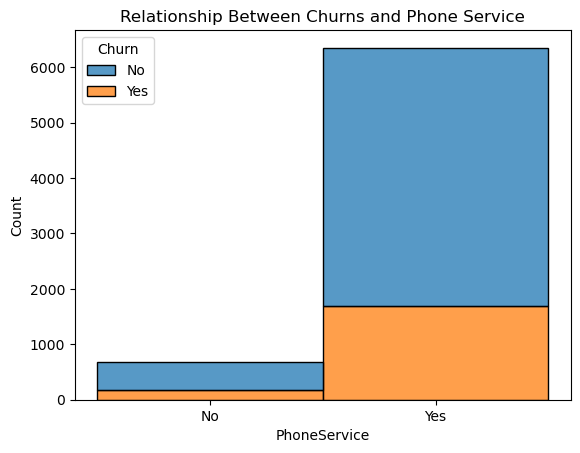

In [251]:
sns.histplot(binwidth=0.5, x="PhoneService", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Phone Service');

In [412]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'Gender', 'partner', 'PS', 'ML', 'IS', 'OS', 'OB', 'dp', 'ts', 'STV',
       'SM', 'contract', 'PB', 'pm'],
      dtype='object')

<Axes: xlabel='InternetService', ylabel='count'>

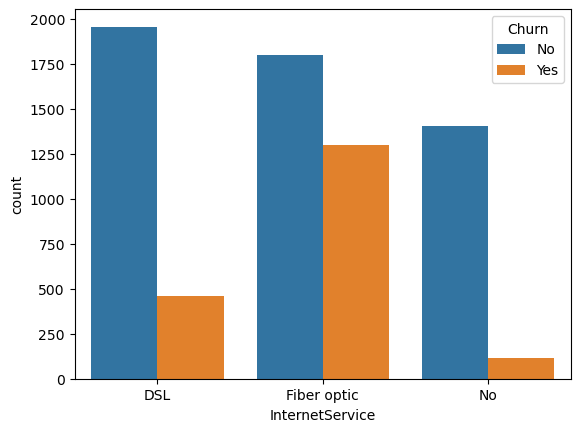

In [112]:
sns.countplot(x='InternetService', hue='Churn', data=df)

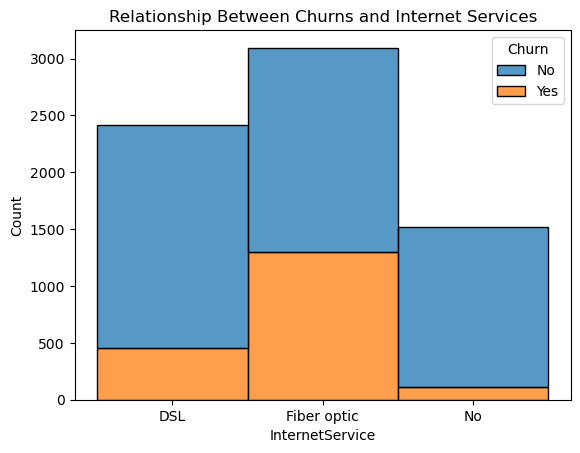

In [110]:
sns.histplot(binwidth=0.5, x="InternetService", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Internet Services');

In [418]:
print(df['TechSupport'].value_counts())

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


In [424]:
print(df['OnlineSecurity'].value_counts())

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


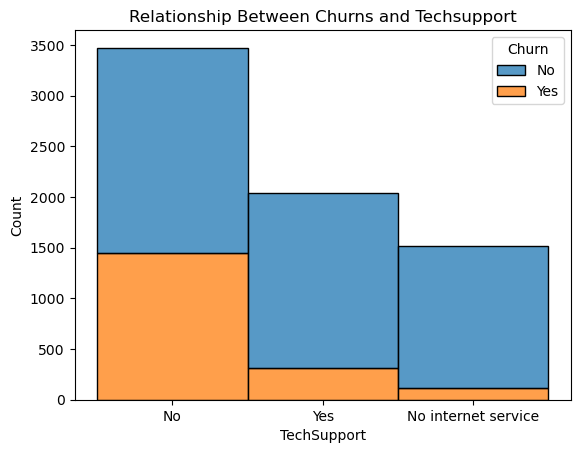

In [416]:
sns.histplot(binwidth=0.5, x="TechSupport", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Techsupport');

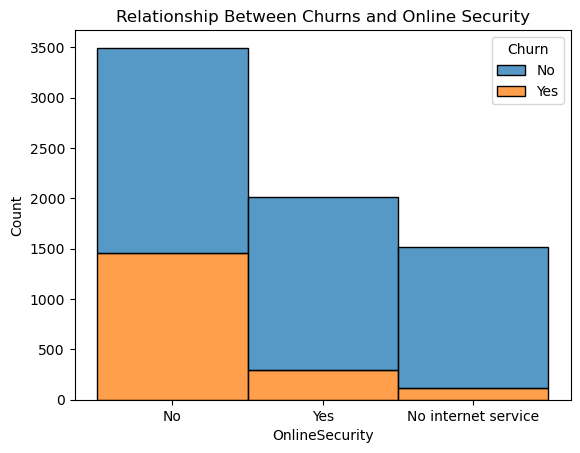

In [252]:
sns.histplot(binwidth=0.5, x="OnlineSecurity", hue="Churn", data=df, stat="count", multiple="stack").set_title('Relationship Between Churns and Online Security');

#### Narration of observation
- From the visualization we can see that customers with a monthly based contract tend to churn while those with two year contracts are less likely
- we also see that males and females have almost the same number of churns but we have more male customers making them less likely to churn than females
- The younger people are less likely to churn and are a major part of the customers of the buisness
- Customers with a tenure of less than 30 are more prone to facing churns with the exemption of outliers
- i also observed that all customers who do not have internet service do not make use of any of the support services that come with it

#### Multivariate Analysis

In [255]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

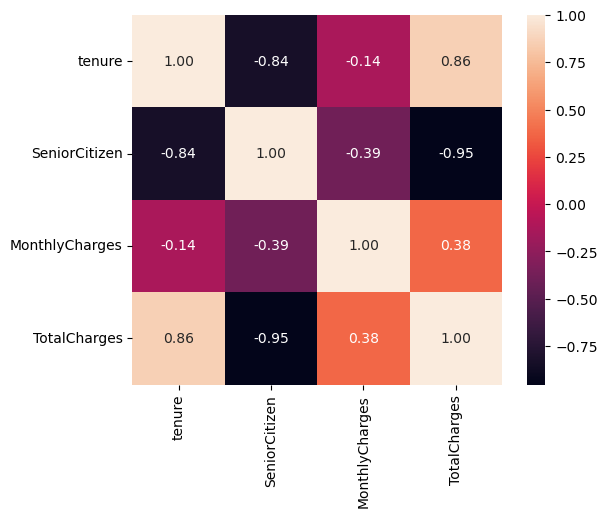

In [106]:
subset_df = df[['tenure','SeniorCitizen','MonthlyCharges', 'TotalCharges']]
a = subset_df.corr()
hm = sns.heatmap(a.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

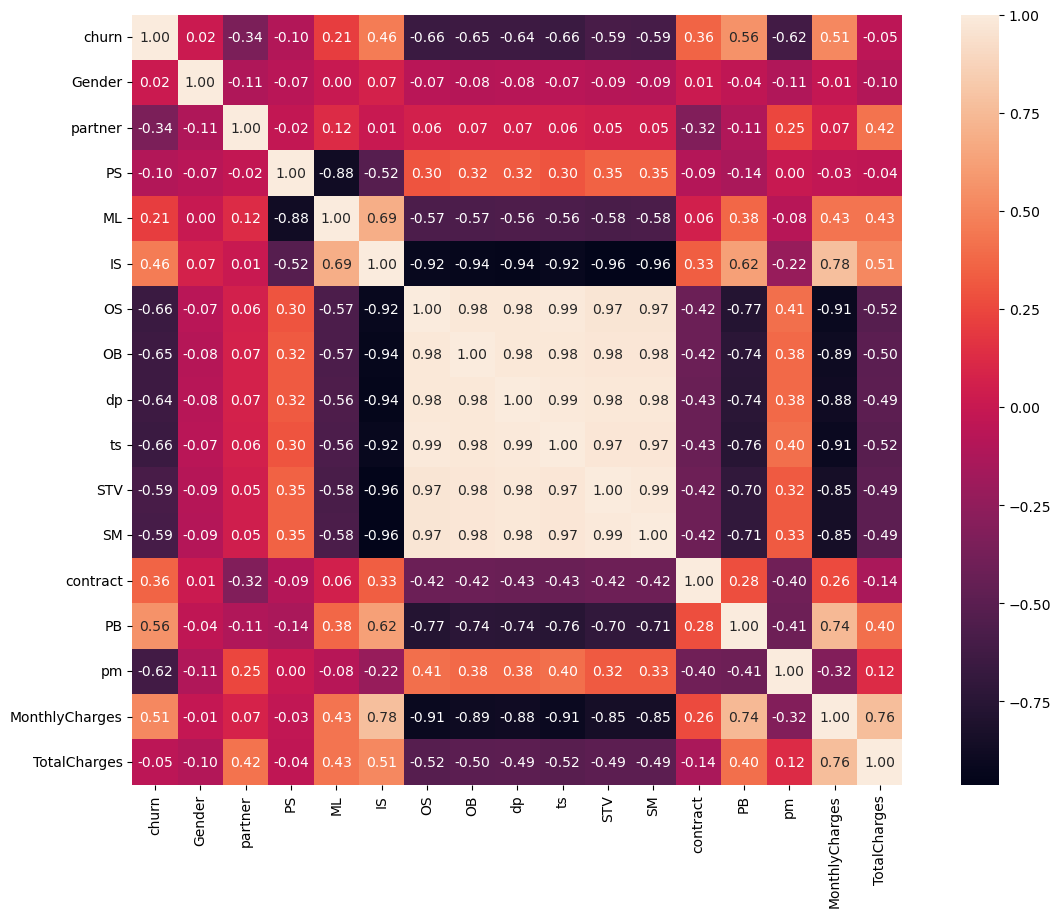

In [100]:
plt.figure(figsize = (15,10))
subset_df = df[['churn','Gender', 'partner', 'PS', 'ML', 'IS', 'OS', 'OB', 'dp', 'ts', 'STV', 'SM', 'contract', 'PB', 'pm','MonthlyCharges', 'TotalCharges']]
a = subset_df.corr()
hm = sns.heatmap(a.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

#### Supervised Machine Learning

In [310]:
df1 = df[['Gender', 'partner', 'PS', 'ML', 'IS', 'OS', 'OB', 'dp', 'ts', 'STV',
       'SM', 'contract', 'PB', 'pm', 'MonthlyCharges', 'TotalCharges']]
label = df[['churn']]

In [311]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'churn',
       'Gender', 'partner', 'PS', 'ML', 'IS', 'OS', 'OB', 'dp', 'ts', 'STV',
       'SM', 'contract', 'PB', 'pm'],
      dtype='object')

In [312]:
df1.dtypes

Gender              int64
partner             int64
PS                  int64
ML                  int64
IS                  int64
OS                  int64
OB                  int64
dp                  int64
ts                  int64
STV                 int64
SM                  int64
contract            int64
PB                  int64
pm                  int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [313]:
label.head()

,churn
0,0
1,0
2,1
3,0
4,1


In [314]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [315]:
# Model Building 
# Logistic Regression
logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
ly_pred = logreg.predict(X_test) 

print("Logistic Regression") 
print('Accuracy:', accuracy_score(y_test, ly_pred)) 
print('Precision:', precision_score(y_test, ly_pred) )
print("Recall:", recall_score (y_test, ly_pred)) 
print("F1-score:", f1_score(y_test, ly_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.7967306325515281
Precision: 0.6594202898550725
Recall: 0.48663101604278075
F1-score: 0.5599999999999999
AUC-ROC: 0.6978169601027069


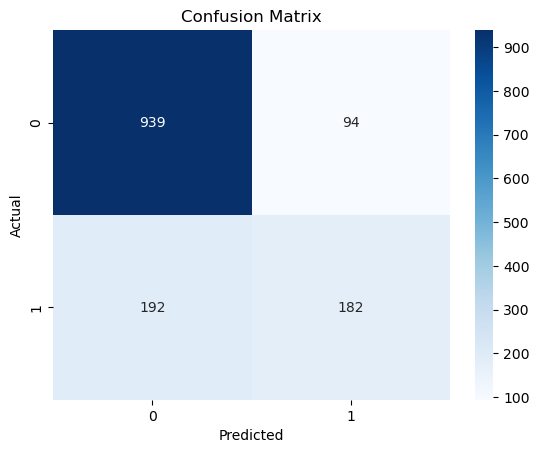

In [348]:
# Create a confusion matrix 
lcm = confusion_matrix(y_test, ly_pred)
# visualize the confusion matrix 
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g") 
plt. xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

#### Most optimal model in the case of true positives and false negatives

In [452]:
# Model Building
# Random Forest Classifier
nb = GaussianNB() 
nb.fit(X_train, y_train) 
nb_pred = nb.predict(X_test) 
print("Naive Bayes")
print("Accuracy:", accuracy_score (y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred)) 
print("Recall:", recall_score(y_test, nb_pred)) 
print("F1-score:" , f1_score(y_test, nb_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))

Naive Bayes
Accuracy: 0.7014925373134329
Precision: 0.4655688622754491
Recall: 0.8315508021390374
F1-score: 0.5969289827255277
AUC-ROC: 0.7429777243996252


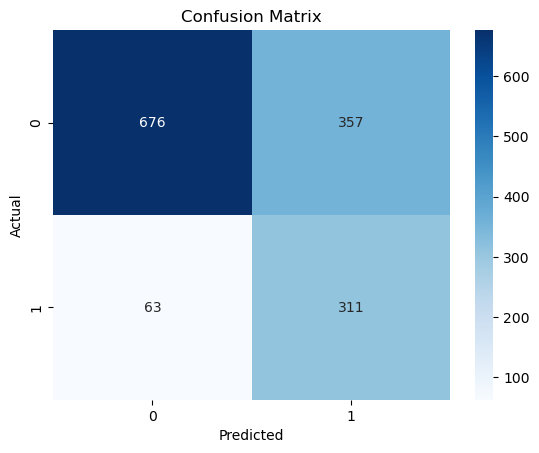

In [449]:
# Create a confusion matrix 
nbcm = confusion_matrix(y_test, nb_pred)
# visualize the confusion matrix 
sns.heatmap(nbcm, annot=True, cmap="Blues", fmt="g") 
plt. xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

In [350]:
# Model Building
# Random Forest Classifier
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
rfy_pred = rfc.predict(X_test) 
print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred)) 
print("Recall:", recall_score(y_test, rfy_pred)) 
print("F1-score:" , f1_score(y_test, rfy_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.7718550106609808
Precision: 0.5910652920962199
Recall: 0.45989304812834225
F1-score: 0.5172932330827068
AUC-ROC: 0.67234729850754


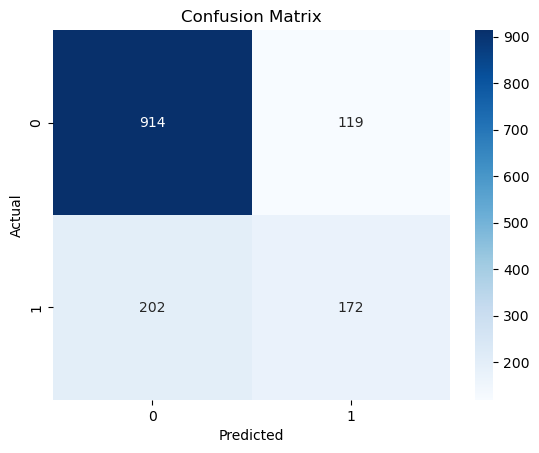

In [352]:
# Create a confusion matrix 
rcm = confusion_matrix(y_test, rfy_pred)
# visualize the confusion matrix 
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g") 
plt. xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

In [437]:
# Model Building
# Random Forest Classifier
xgb = XGBClassifier() 
xgb.fit(X_train, y_train) 
xgb_pred = xgb.predict(X_test) 
print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred)) 
print("Recall:", recall_score(y_test, xgb_pred)) 
print("F1-score:" , f1_score(y_test, xgb_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

Logistic Regression
Accuracy: 0.7661691542288557
Precision: 0.5732899022801303
Recall: 0.47058823529411764
F1-score: 0.5168869309838473
AUC-ROC: 0.6718865668242128


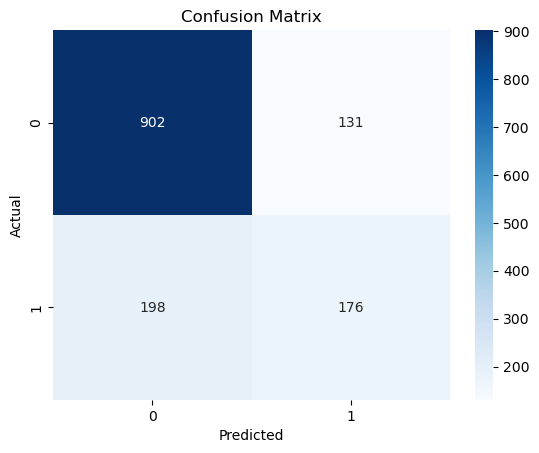

In [439]:
# Create a confusion matrix 
xcm = confusion_matrix(y_test, xgb_pred)
# visualize the confusion matrix 
sns.heatmap(xcm, annot=True, cmap="Blues", fmt="g") 
plt. xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

In [433]:
# Model Building
# Random Forest Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train) 
knc_pred = knc.predict(X_test) 
print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, knc_pred))
print("Precision:", precision_score(y_test, knc_pred)) 
print("Recall:", recall_score(y_test, knc_pred)) 
print("F1-score:" , f1_score(y_test, knc_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, knc_pred)) 

Logistic Regression
Accuracy: 0.7704335465529495
Precision: 0.5901060070671378
Recall: 0.446524064171123
F1-score: 0.5083713850837138
AUC-ROC: 0.667114887845484


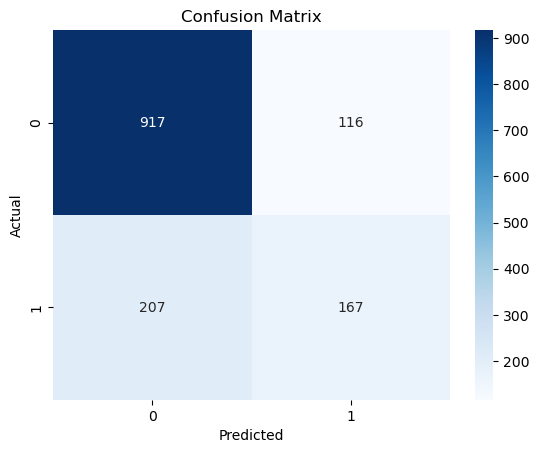

In [435]:
# Create a confusion matrix 
kcm = confusion_matrix(y_test, knc_pred)
# visualize the confusion matrix 
sns.heatmap(kcm, annot=True, cmap="Blues", fmt="g") 
plt. xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix") 
plt.show()

In [441]:
# Model Building
# Random Forest Classifier
snc = SVC()
snc.fit(X_train, y_train) 
snc_pred = snc.predict(X_test) 
print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, snc_pred))
print("Precision:", precision_score(y_test, snc_pred)) 
print("Recall:", recall_score(y_test, snc_pred)) 
print("F1-score:" , f1_score(y_test, snc_pred)) 
print("AUC-ROC:", roc_auc_score(y_test, snc_pred)) 

Logistic Regression
Accuracy: 0.7341862117981521
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


In [374]:
#8 Machine learning algorithms to be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']]

In [376]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred =  model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [378]:
print('Accuracy score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,76.62%,78.32%,77.04%,77.19%,73.42%,70.15%,73.63%,79.67%


#### Narration of observation
- Out of all predictions Logistic Regression Model has the highest accuracy score percentage followed by Random Forest Model then SGD

In [380]:
print('Precision score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,57.33%,61.62%,59.01%,64.97%,0.0%,46.56%,50.4%,65.94%


#### Narration of observation
- Out of all predictions Logistic Regression Model has the highest precision score percentage followed by SGD and then Random Forest Model

In [382]:
print('Recall score')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,47.06%,48.93%,44.65%,30.75%,0.0%,83.16%,51.07%,48.66%


#### Narration of observation
- Out of all predictions Naive Bayes Model has the highest Recall score percentage then Decision tree and the Random forest Model

In [384]:
print('ROC score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,67.19%,68.95%,66.71%,62.37%,50.0%,74.3%,66.44%,69.78%


#### Narration of observation
- Out of all predictions Naive Bayes Model has the highest ROC score percentage followed by Logistic Regression and then Random forest Model

In [360]:
print(df['churn'].value_counts())

churn
0    5163
1    1869
Name: count, dtype: int64


In [362]:
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64
